# Load package

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as transforms

import networks

# Initialize Depth Prediction Model

In [2]:
depth_encoder = networks.ResnetEncoder(18, False)
depth_decoder = networks.HRDepthDecoder(depth_encoder.num_ch_enc)

depth_encoder_path = "./models/encoder.pth"
depth_decoder_path = "./models/depth.pth"

encoder_dict = torch.load(depth_encoder_path)
img_height = encoder_dict["height"]
img_width = encoder_dict["width"]
print("Test image height is:", img_height)
print("Test image width is:", img_width)
load_dict = {k: v for k, v in encoder_dict.items() if k in depth_encoder.state_dict()}

decoder_dict = torch.load(depth_decoder_path)

depth_encoder.load_state_dict(load_dict)
depth_decoder.load_state_dict(decoder_dict)

Test image height is: 384
Test image width is: 1280


<All keys matched successfully>

# Monocular Depth Estimation

Text(0.5, 1.0, 'Disparity Prediction')

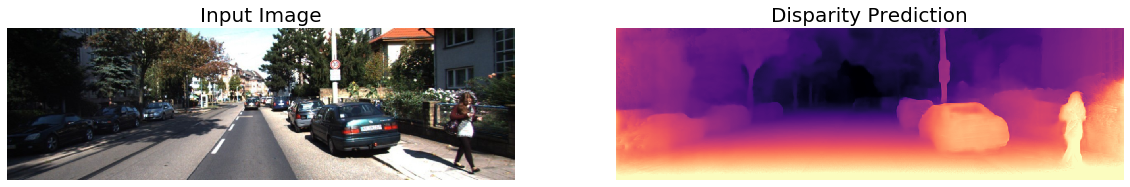

In [3]:
img_path = "/home/lxy/Desktop/test1.jpg"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (img_width, img_height))

image_tensor = transforms.ToTensor()(image).unsqueeze(0)

# predict depth from single image
result = depth_decoder(depth_encoder(image_tensor))

disparity = result[("disparity", "Scale0")].cpu().detach().squeeze().numpy()
vmax = np.percentile(disparity, 95)
# show prediction result
plt.figure(figsize=(20,5))
plt.subplot(121);plt.imshow(image);plt.axis('off');plt.title("Input Image",fontsize=20)
plt.subplot(122);plt.imshow(disparity, vmax=vmax, cmap="magma");plt.axis('off');plt.title("Disparity Prediction", fontsize=20)